<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


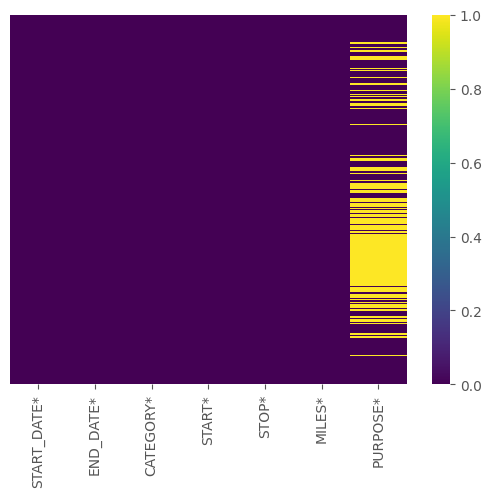

<Axes: xlabel='PURPOSE*'>

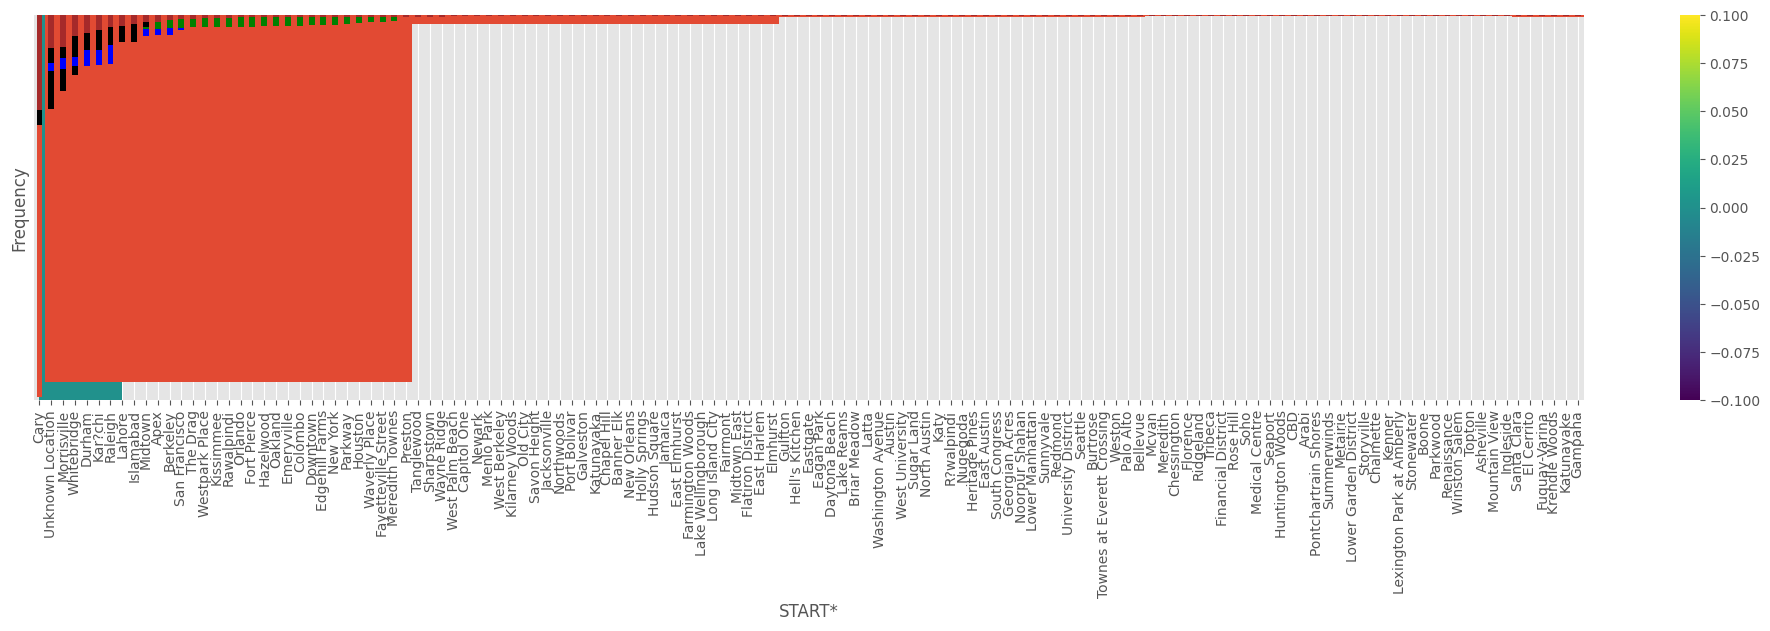

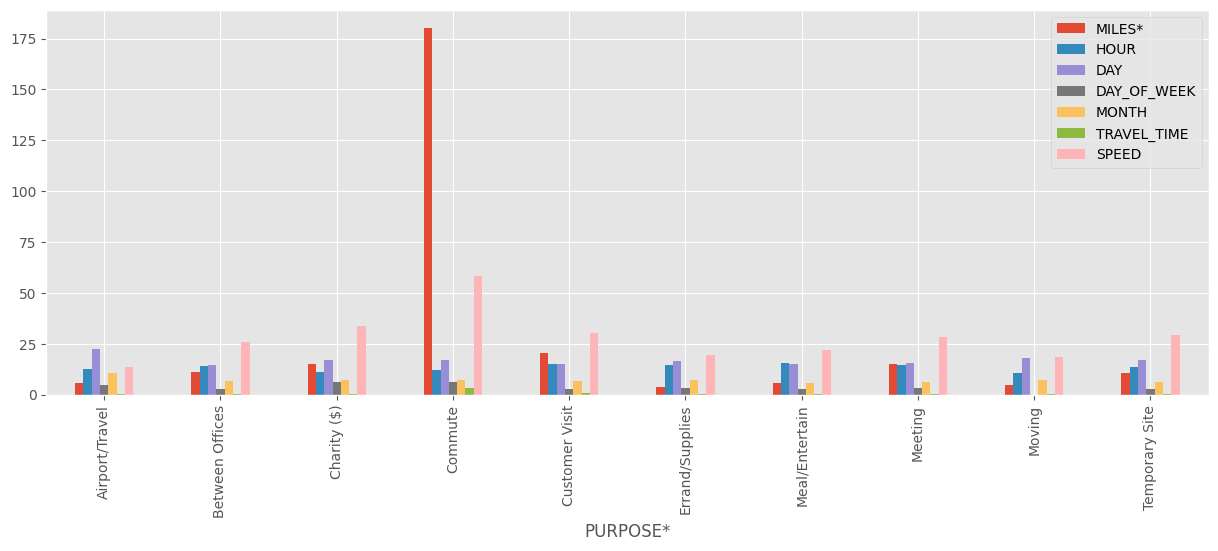

In [3]:
# -*- coding: utf-8 -*-
"""Uber

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/123zWw3RZhNvu25hcIsUbL0T2KPDL8atm
"""

import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
import calendar
dataset=pd.read_csv('my_Uber.csv')
dataset.head()

dataset.tail()

dataset.info()

dataset=dataset[:-1]
dataset.isnull().sum()

sns.heatmap(dataset.isnull(),yticklabels=False,cmap="viridis")

import matplotlib.pyplot as plt
plt.show()

dataset=dataset.dropna()
sns.heatmap(dataset.isnull(),yticklabels=False,cmap="viridis")

dataset['START_DATE*'] = pd.to_datetime(dataset['START_DATE*'],
format="%m/%d/%Y %H:%M")
dataset['END_DATE*'] = pd.to_datetime(dataset['END_DATE*'],
format="%m/%d/%Y %H:%M")
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in dataset['START_DATE*']:
 hour.append(x.hour)
 day.append(x.day)
 dayofweek.append(x.dayofweek)
 month.append(x.month)
 weekday.append(calendar.day_name[dayofweek[-1]])
dataset['HOUR']=hour
dataset['DAY']=day
dataset['DAY_OF_WEEK']=dayofweek
dataset['MONTH']=month
dataset['WEEKDAY']=weekday
time=[]
dataset['TRAVEL_TIME']=dataset['END_DATE*']-dataset['START_DATE*']
for i in dataset['TRAVEL_TIME']:
 time.append(i.seconds/60)
dataset['TRAVEL_TIME']=time
dataset.head()

dataset['TRAVEL_TIME']=dataset['TRAVEL_TIME']/60
dataset['SPEED']=dataset['MILES*']/dataset['TRAVEL_TIME']
dataset.head()

dataset.describe()

def convert_time(column_name):
    y=[]
    for x in dataset[column_name]:
        # Indented this line to be part of the for loop
        y.append(datetime.datetime.strptime('1/1/2016 21:11',
"%m/%d/%Y %H:%M"))
    dataset[column_name] = y
column_date=dataset[['START_DATE*','END_DATE*']]
for x in column_date:
    convert_time(x)
x = dataset['CATEGORY*'].value_counts().plot(kind='bar')

dataset['MILES*'].plot.hist()

dataset['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='black')

dataset['HOUR'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

dataset['WEEKDAY'].value_counts().plot(kind='bar',color='blue')

dataset['DAY'].value_counts().plot(kind='bar',figsize=(15,5),color='green')

dataset['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='black')

dataset['START*'].value_counts().plot(kind='bar',figsize=(25,5),color=
'brown')

# Select only numerical features for calculating the mean.
numerical_features = dataset.select_dtypes(include=np.number).columns
dataset.groupby('PURPOSE*')[numerical_features].mean().plot(kind='bar', figsize=(15, 5))

# New section